In [99]:
# Install the required libraries
!pip install prophet
!pip install matplotlib

In [104]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
home_ownership_rate = pd.read_csv("Home Ownership Rate (Hamilton, OH) - Home Ownership Rate.csv")
us_census = pd.read_csv("US Census (Hamilton, OH) - Sheet1.csv")
home_value_forecast = pd.read_csv("Home Value Forecast - Sheet1.csv")
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")
zestimate = pd.read_csv("Zillow Housing Estimate Index - Sheet1.csv")

display(home_ownership_rate.head()) # How many people owns housing in Hamilton county

,DATE,HOWNRATEACS039061
0,1/1/2009,67.089647
1,1/1/2010,65.820411
2,1/1/2011,65.362558
3,1/1/2012,64.354125
4,1/1/2013,63.293043


In [4]:
# This shows the population for Hamilton county
us_census_transposed = us_census.set_index("Fact").transpose()

display(us_census_transposed) 

Fact,"Population estimates, July 1, 2023, (V2023)","Population Estimates, July 1, 2022, (V2022)","Population estimates base, April 1, 2020, (V2023)","Population estimates base, April 1, 2020, (V2022)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2022, (V2022)","Population, Census, April 1, 2020","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent",...,"Women-owned employer firms, Reference year 2017","Minority-owned employer firms, Reference year 2017","Nonminority-owned employer firms, Reference year 2017","Veteran-owned employer firms, Reference year 2017","Nonveteran-owned employer firms, Reference year 2017","Population per square mile, 2020","Population per square mile, 2010","Land area in square miles, 2020","Land area in square miles, 2010",FIPS Code
"Hamilton County, Ohio",NaN,"825,037",NaN,"830,625",NaN,-0.70%,"830,639","802,374",6.10%,22.60%,...,"2,735","1,150","11,949",846,"12,077","2,048.90","1,976.70",405.41,405.91,"""39061"""


In [5]:
#display(home_value_forecast) # A month-ahead, quarter-ahead and year-ahead forecast of the Zillow Home Value Index (ZHVI)
home_value_forecast_dropped = home_value_forecast.dropna()

display(home_value_forecast_dropped)

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,12/31/2023,2/29/2024,11/30/2024
1,394913,1,"New York, NY",msa,NY,11/30/2023,0.1,-0.5,-2.9
2,753899,2,"Los Angeles, CA",msa,CA,11/30/2023,0.3,-1.0,-2.2
3,394463,3,"Chicago, IL",msa,IL,11/30/2023,0.1,-0.3,-2.2
4,394514,4,"Dallas, TX",msa,TX,11/30/2023,-0.2,-0.8,-0.8
5,394692,5,"Houston, TX",msa,TX,11/30/2023,-0.3,-1.1,-2.0
...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,11/30/2023,-1.6,-3.9,-9.5
891,394743,936,"Ketchikan, AK",msa,AK,11/30/2023,-0.5,-1.0,-3.8
892,753874,937,"Craig, CO",msa,CO,11/30/2023,0.0,-0.3,1.0
893,395188,938,"Vernon, TX",msa,TX,11/30/2023,-1.3,-2.8,-5.0


In [6]:
display(metro_sales_count.head()) # The estimated number of unique properties that sold during the month

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,102001,0,United States,country,NaN,205206,238071,264215,290180,304596,...,236545,324071,299951,360423,381898,327706.0,356022.0,307974.0,291856.0,256938
1,394913,1,"New York, NY",msa,NY,8591,8967,9977,10232,10854,...,8915,11164,10446,12425,14692,13076.0,15184.0,12678.0,12449.0,10864
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,4634,6728,6033,7180,7319,6223.0,6964.0,5742.0,5791.0,4965
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,5744,8927,8633,10623,11254,9655.0,10521.0,8840.0,8601.0,7128
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,5294,6831,6500,7941,7816,6886.0,7067.0,5686.0,5283.0,4779


In [7]:
metro_sales_count.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2/29/2008', '3/31/2008', '4/30/2008', '5/31/2008', '6/30/2008',
       ...
       '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023', '6/30/2023',
       '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023', '11/30/2023'],
      dtype='object', length=195)

In [8]:
metro_sales_count_renamed = metro_sales_count.rename(columns={'RegionID': 'Region ID',
                                                              'SizeRank': 'Size Rank',
                                                              'RegionName': 'Region Name',
                                                              'RegionType': 'Region Type',
                                                              'StateName': 'State',
                                                              })
metro_sales_count_renamed

,Region ID,Size Rank,Region Name,Region Type,State,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,102001,0,United States,country,NaN,205206,238071,264215,290180,304596,...,236545,324071,299951,360423,381898,327706.0,356022.0,307974.0,291856.0,256938
1,394913,1,"New York, NY",msa,NY,8591,8967,9977,10232,10854,...,8915,11164,10446,12425,14692,13076.0,15184.0,12678.0,12449.0,10864
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,4634,6728,6033,7180,7319,6223.0,6964.0,5742.0,5791.0,4965
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,5744,8927,8633,10623,11254,9655.0,10521.0,8840.0,8601.0,7128
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,5294,6831,6500,7941,7816,6886.0,7067.0,5686.0,5283.0,4779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,395006,92,"Provo, UT",msa,UT,363,353,454,450,445,...,464,578,585,636,626,592.0,606.0,494.0,436.0,410
90,395160,93,"Toledo, OH",msa,OH,336,365,442,479,488,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574
91,395224,94,"Wichita, KS",msa,KS,236,369,360,277,447,...,186,284,228,243,327,264.0,284.0,282.0,251.0,100
92,394549,95,"Durham, NC",msa,NC,418,528,556,792,794,...,478,747,683,785,907,675.0,736.0,639.0,588.0,530


In [9]:
metro_sales_count_renamed.count()

Region ID      94
Size Rank      94
Region Name    94
Region Type    94
State          93
               ..
7/31/2023      93
8/31/2023      93
9/30/2023      93
10/31/2023     93
11/30/2023     94
Length: 195, dtype: int64

In [12]:
metro_sales_count_renamed.dropna()
#metro_sales_count_renamed.isnull().sum()

,Region ID,Size Rank,Region Name,Region Type,State,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,4634,6728,6033,7180,7319,6223.0,6964.0,5742.0,5791.0,4965
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,5744,8927,8633,10623,11254,9655.0,10521.0,8840.0,8601.0,7128
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,5294,6831,6500,7941,7816,6886.0,7067.0,5686.0,5283.0,4779
6,395209,6,"Washington, DC",msa,VA,4127,5017,5745,6236,7179,...,4647,6200,6179,7589,7799,6247.0,6511.0,5380.0,5232.0,4524
7,394974,7,"Philadelphia, PA",msa,PA,4173,4958,5730,5783,6458,...,4544,6253,5946,6813,7783,6583.0,7151.0,6159.0,5907.0,5472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,395006,92,"Provo, UT",msa,UT,363,353,454,450,445,...,464,578,585,636,626,592.0,606.0,494.0,436.0,410
90,395160,93,"Toledo, OH",msa,OH,336,365,442,479,488,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574
91,395224,94,"Wichita, KS",msa,KS,236,369,360,277,447,...,186,284,228,243,327,264.0,284.0,282.0,251.0,100
92,394549,95,"Durham, NC",msa,NC,418,528,556,792,794,...,478,747,683,785,907,675.0,736.0,639.0,588.0,530


In [15]:
ohio_metro_sales_df = metro_sales_count_renamed.loc[(metro_sales_count_renamed['State'] == 'OH')]
ohio_metro_sales_df

,Region ID,Size Rank,Region Name,Region Type,State,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
28,394466,28,"Cincinnati, OH",msa,OH,1603,1873,1963,2276,2442,...,1659,2421,2225,2554,2941,2537.0,2603.0,2322.0,2307.0,2170
32,394492,32,"Columbus, OH",msa,OH,1267,1377,1488,1563,1731,...,1563,2011,1936,2310,2574,2124.0,2478.0,2005.0,2010.0,1766
34,394475,35,"Cleveland, OH",msa,OH,1257,1468,1605,1794,1952,...,1596,2079,1829,2435,2549,2178.0,2501.0,2283.0,2115.0,1985
81,394304,83,"Akron, OH",msa,OH,405,413,486,490,609,...,646,763,670,820,870,747.0,849.0,755.0,790.0,675
90,395160,93,"Toledo, OH",msa,OH,336,365,442,479,488,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574


In [44]:
#Saved 'Region Name' as a df to join later after converting date columns to datetime
region_name = ohio_metro_sales_df['Region Name']
region_name

28    Cincinnati, OH
32      Columbus, OH
34     Cleveland, OH
81         Akron, OH
90        Toledo, OH
Name: Region Name, dtype: object

In [50]:
#Droped non-numerical columns
dates_data = ohio_metro_sales_df.drop(columns=['Region ID', 'Size Rank', 'Region Type','State', 'Region Name'])
dates_data

,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
28,1603,1873,1963,2276,2442,2305,2228,2113,2001,1447,...,1659,2421,2225,2554,2941,2537.0,2603.0,2322.0,2307.0,2170
32,1267,1377,1488,1563,1731,1675,1701,1494,1492,1024,...,1563,2011,1936,2310,2574,2124.0,2478.0,2005.0,2010.0,1766
34,1257,1468,1605,1794,1952,1857,1790,1830,1899,1451,...,1596,2079,1829,2435,2549,2178.0,2501.0,2283.0,2115.0,1985
81,405,413,486,490,609,560,596,578,569,397,...,646,763,670,820,870,747.0,849.0,755.0,790.0,675
90,336,365,442,479,488,496,473,451,466,374,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574


In [55]:
#converted columns to datetime 
dates_data.columns = pd.to_datetime(dates_data.columns)
dates_data

,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,...,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30
28,1603,1873,1963,2276,2442,2305,2228,2113,2001,1447,...,1659,2421,2225,2554,2941,2537.0,2603.0,2322.0,2307.0,2170
32,1267,1377,1488,1563,1731,1675,1701,1494,1492,1024,...,1563,2011,1936,2310,2574,2124.0,2478.0,2005.0,2010.0,1766
34,1257,1468,1605,1794,1952,1857,1790,1830,1899,1451,...,1596,2079,1829,2435,2549,2178.0,2501.0,2283.0,2115.0,1985
81,405,413,486,490,609,560,596,578,569,397,...,646,763,670,820,870,747.0,849.0,755.0,790.0,675
90,336,365,442,479,488,496,473,451,466,374,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574


In [61]:
#Createing blank column for Dates to prepare to transpose columns
dates_data['Date'] = ''
dates_data

,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,...,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,Date
28,1603,1873,1963,2276,2442,2305,2228,2113,2001,1447,...,2421,2225,2554,2941,2537.0,2603.0,2322.0,2307.0,2170,
32,1267,1377,1488,1563,1731,1675,1701,1494,1492,1024,...,2011,1936,2310,2574,2124.0,2478.0,2005.0,2010.0,1766,
34,1257,1468,1605,1794,1952,1857,1790,1830,1899,1451,...,2079,1829,2435,2549,2178.0,2501.0,2283.0,2115.0,1985,
81,405,413,486,490,609,560,596,578,569,397,...,763,670,820,870,747.0,849.0,755.0,790.0,675,
90,336,365,442,479,488,496,473,451,466,374,...,553,640,671,789,634.0,757.0,566.0,640.0,574,


In [64]:
#Transposing the dataframe to set the dates as the index
dates_data_t = dates_data.set_index('Date').T
dates_data_t

Date,,,,,
2008-02-29,1603.0,1267.0,1257.0,405.0,336.0
2008-03-31,1873.0,1377.0,1468.0,413.0,365.0
2008-04-30,1963.0,1488.0,1605.0,486.0,442.0
2008-05-31,2276.0,1563.0,1794.0,490.0,479.0
2008-06-30,2442.0,1731.0,1952.0,609.0,488.0
...,...,...,...,...,...
2023-07-31,2537.0,2124.0,2178.0,747.0,634.0
2023-08-31,2603.0,2478.0,2501.0,849.0,757.0
2023-09-30,2322.0,2005.0,2283.0,755.0,566.0
2023-10-31,2307.0,2010.0,2115.0,790.0,640.0


In [92]:
dates_data_t['Date'] = pd.to_datetime(dates_data_t.index)
dates_data_t.drop(columns='Date')
dates_data_t.set_index('Date', inplace=True)

In [93]:
dates_data_t.resample('Y').sum()

Date,,,,,
Date,,,,,
2008-12-31,21844.0,15992.0,18522.0,5598.0,4751.0
2009-12-31,22814.0,16552.0,18762.0,5996.0,5335.0
2010-12-31,20615.0,16775.0,17509.0,5127.0,5365.0
2011-12-31,21080.0,17146.0,17288.0,5503.0,5596.0
2012-12-31,24166.0,20757.0,20751.0,6583.0,6503.0
2013-12-31,29996.0,26430.0,23942.0,7840.0,7255.0
2014-12-31,29358.0,27370.0,23432.0,8104.0,7238.0
2015-12-31,31519.0,29189.0,26215.0,9402.0,7678.0
2016-12-31,35610.0,29872.0,28454.0,9898.0,8097.0


In [96]:
#Named blank columns
dates_data_t.columns = ['Cincinnati', 'Columbus', 'Cleveland', 'Akron', 'Toledo']
dates_data_t

,Cincinnati,Columbus,Cleveland,Akron,Toledo
Date,,,,,
2008-02-29,1603.0,1267.0,1257.0,405.0,336.0
2008-03-31,1873.0,1377.0,1468.0,413.0,365.0
2008-04-30,1963.0,1488.0,1605.0,486.0,442.0
2008-05-31,2276.0,1563.0,1794.0,490.0,479.0
2008-06-30,2442.0,1731.0,1952.0,609.0,488.0
...,...,...,...,...,...
2023-07-31,2537.0,2124.0,2178.0,747.0,634.0
2023-08-31,2603.0,2478.0,2501.0,849.0,757.0
2023-09-30,2322.0,2005.0,2283.0,755.0,566.0


<Axes: xlabel='Date'>

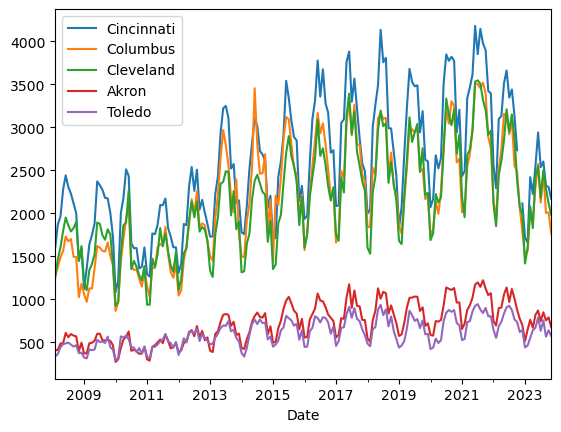

In [102]:
dates_data_t.plot()

Text(0.5, 1.0, 'Houses Sold')

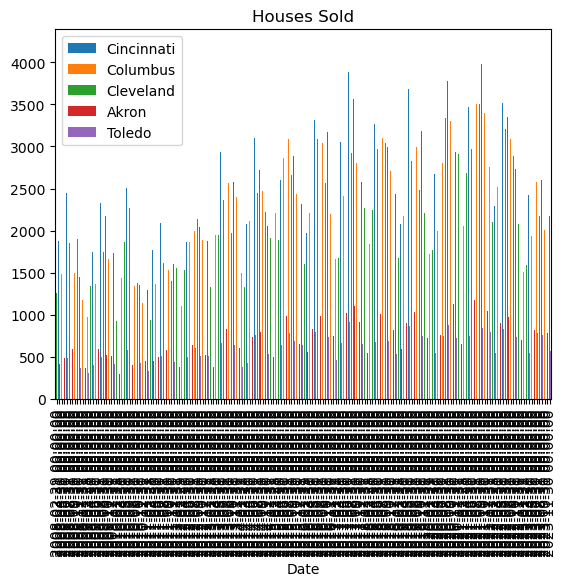

In [111]:
dates_data_t.plot(kind='bar')
plt.title("Houses Sold")
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.show

In [19]:
display(new_construction_sales.head()) # New houses built

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
0,102001,0,United States,country,NaN,37066.0,36475.0,46872.0,41641.0,44494.0,...,24569.0,31273.0,42895.0,37818.0,42978.0,42341.0,34096.0,37166.0,33917.0,31641.0
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0


In [16]:
display(zestimate.head()) # A mean price of the housing, takes into consideration how prices are appreciating in a particular location

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,394466,28,"Cincinnati, OH",msa,OH,123285.59080,123248.6175,123190.11390,123465.08810,123998.75980,...,256429.8895,257186.0028,258907.0016,261391.1562,263944.2553,266223.3256,267886.2660,268921.0643,269405.3712,269668.9344
1,394492,32,"Columbus, OH",msa,OH,122802.19670,122909.1501,123081.82620,123429.69540,123850.70580,...,284776.9682,285236.2615,286804.2594,288978.0312,291477.0123,293844.5102,295975.9036,297656.6676,298865.4308,299588.3884
2,394475,35,"Cleveland, OH",msa,OH,115713.93960,115883.6149,116056.98890,116418.73980,116976.62730,...,202291.0216,202583.4009,203810.8053,205405.5919,207243.7700,209038.5210,210793.6855,212232.2111,213380.3142,214136.1425
3,394304,83,"Akron, OH",msa,OH,106289.14790,106456.4836,106577.02750,106875.41180,107149.62400,...,194782.3361,195229.4814,196585.1946,198324.0854,200149.8978,201907.0226,203367.1560,204596.9838,205441.5261,206093.6075
4,395160,93,"Toledo, OH",msa,OH,83501.85695,83582.9768,83699.29069,84039.18756,84556.47498,...,165502.3824,165836.6763,167074.6010,168790.1211,170897.0878,173017.8861,174626.7266,175847.7469,176854.7346,177813.3466
